In [1]:
import pandas as pd
import matplotlib

In [2]:
all_data_df = pd.read_pickle('../all_data_sim_score_max_features_100000.pkl')

In [3]:
all_data_df.head()

,title,text,tags,date,subcategory,category,sim_score
0,Aplicaţia de telefon cu care poţi face POZE 3D,Aplicația se numește LucidPix și a fost până a...,"[android, iphone, poze 3d, telefon]",17 iun 2020 / 16:07,"[Tehnologie, Tehnologie]",Tehnologie,0.176560
1,Cum să dezactivezi anunțurile din Windows 10 ș...,Anunțurile din Windows 10 pot fi enervante și ...,"[ads, adverts, anunturi, cum sa, start, window...",06 feb 2020 / 14:17,[Lifestyle],Tehnologie,0.083821
2,Acasă la cel mai MARE jucător de sporturi ELEC...,"Într-o postare pe Instagram, BBC a postat imag...","[casa, electronice, jocuri, johan sundstein, n...",17 ian 2021 / 15:13,"[Stiri, Internațional]",Tehnologie,0.093520
3,De ce suntem mințiți despre capacitatea de sto...,Dacă ați cumpărat vreodată un HDD (Hard Disk D...,"[capacitate, hdd, memorie ram, memorie rom, ss...",03 feb 2020 / 14:14,[Lifestyle],Tehnologie,0.224240
4,"Wikipedia, SCHIMBARE după 10 ani! La ce să se ...","Conform The Verge, versiunea de desktop a site...","[international, site, tehnologie, wikipedia]",24 sep 2020 / 08:16,"[Tehnologie, Tehnologie]",Tehnologie,0.118797


<AxesSubplot:xlabel='category'>

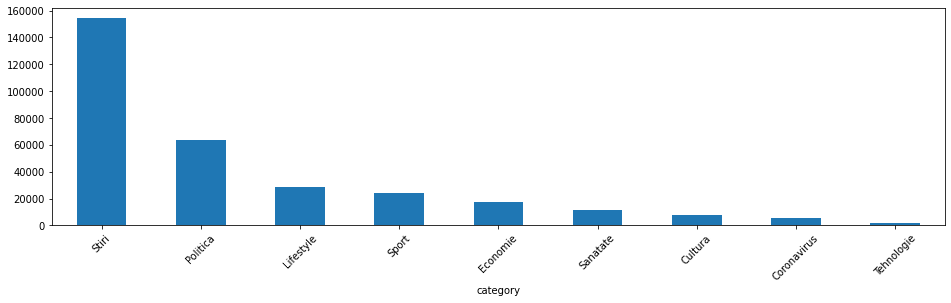

In [11]:
all_data_df.groupby(['category']).count().sort_values(ascending=False, by='title')['title'].plot(kind='bar', rot='45', figsize=(16,4))

<AxesSubplot:xlabel='subcategory'>

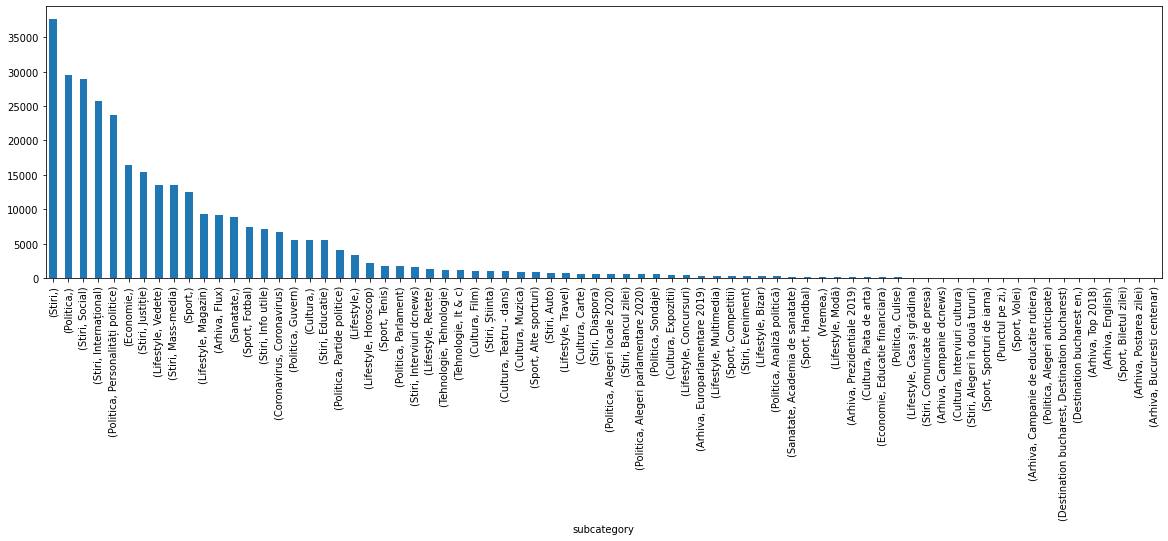

In [12]:
all_data_df.groupby(all_data_df['subcategory'].map(tuple))['title'].count().sort_values(ascending=False).plot(kind='bar', rot='90', figsize=(20,5))

In [4]:
max(all_data_df.sim_score)

0.7946365731760321

<AxesSubplot:>

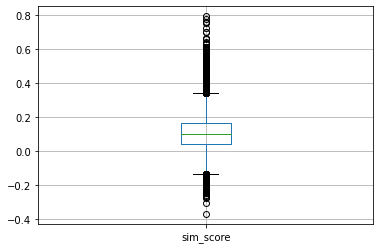

In [5]:
all_data_df.boxplot(column=['sim_score'])

<AxesSubplot:>

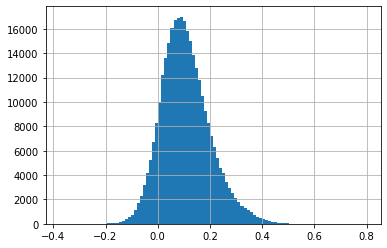

In [6]:
all_data_df.sim_score.hist(bins=100)

In [7]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
lognorm,0.724288,1173.797376,-4.088861e+06,inf
gamma,1.471054,1109.517426,-3.865705e+06,inf
chi2,1.964418,1046.930418,-3.774616e+06,inf
norm,5.426770,1126.767193,-3.454594e+06,inf
cauchy,19.289169,264.729474,-3.055176e+06,inf


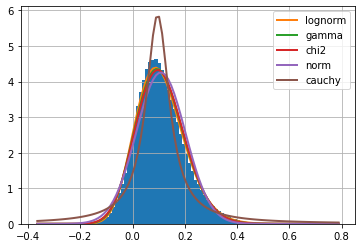

In [9]:
f = Fitter(all_data_df.sim_score,
           distributions= get_common_distributions())
f.fit()
f.summary()